In [6]:
df = pd.read_csv("/kaggle/input/sgf-pln2/pln2.csv")
df.head()

NameError: name 'pd' is not defined

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 336 entries, 0 to 335

Data columns (total 6 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   sp      336 non-null    int64  

 1   temp    336 non-null    int64  

 2   time    336 non-null    int64  

 3   medium  336 non-null    int64  

 4   gr      336 non-null    float64

 5   ptl     336 non-null    float64

dtypes: float64(2), int64(4)

memory usage: 15.9 KB


In [17]:
df.describe()

,sp,temp,time,medium,gr,ptl
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,1.500000,20.000000,11.000000,2.000000,11.117619,35.558839
std,1.119701,10.014914,8.319013,0.817714,17.990307,34.379059
min,0.000000,5.000000,2.000000,1.000000,0.000000,0.000000
25%,0.750000,10.000000,5.000000,1.000000,1.052500,10.110000
50%,1.500000,20.000000,9.000000,2.000000,3.440000,24.000000
75%,2.250000,30.000000,15.000000,3.000000,10.060000,60.595000
max,3.000000,35.000000,24.000000,3.000000,82.080000,140.000000


In [20]:
df.corr()["temp"].sort_values(ascending=False)

temp      1.000000e+00
ptl       3.783379e-01
gr        3.043288e-01
medium    1.618738e-17
time     -1.731152e-17
sp       -2.080600e-16
Name: temp, dtype: float64

In [15]:
X=df.iloc[:,1:4].values
y=df.iloc[:,4].values
print(X)
print(y)

[[ 5  2  1]

 [10  2  1]

 [15  2  1]

 ...

 [25 24  3]

 [30 24  3]

 [35 24  3]]

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.

  0.    0.    0.    0.    0.   14.21 18.65  7.11  1.21  1.17  1.29 10.25

 31.85 51.24 47.82 40.31  0.    0.    0.    0.    1.58  1.    1.    0.

  0.    1.07  2.84  3.01  2.56  2.3   0.    0.    2.06  6.51  8.91  7.85

  5.24  1.03  5.21  8.34 13.69 49.69 41.36 34.67  0.    0.    1.25  2.35

  2.45  2.01  1.61  0.    1.02  2.99  3.47  4.11  5.03  4.08  0.    0.

  1.06  1.43  2.71  1.84  1.77  0.    1.17  5.57 51.95 57.96 47.68 50.67

  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.74  2.98

  2.51  3.01  0.    0.    1.24 10.87 21.98 25.64 21.64  3.14  3.65  7.1

 45.88 48.27 51.2  51.01  0.    0.    0.    2.64  2.58  4.08  4.65  1.07

  1.64  1.91  4.03  3.98  4.5   4.09  1.34  1.25  1.91  4.98 14.65 12.3

 12.3   3.99  5.14 17.96 54.61 69.02 64.58 67.89  0.    0.    0.    1.16

  2.23  0.    0.    1.76  3.56  4.1

<Axes: >

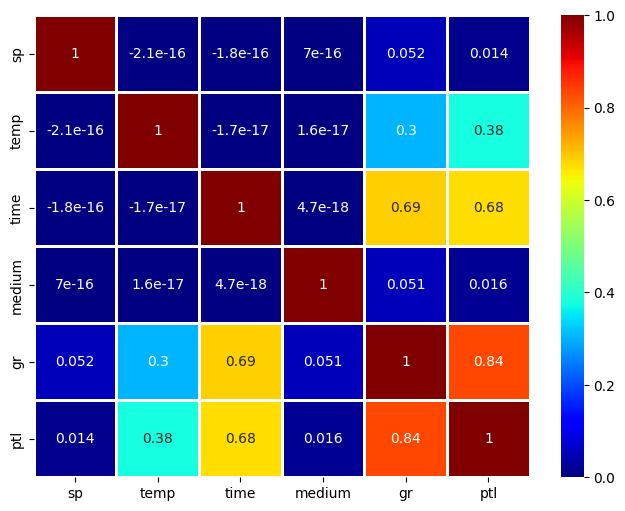

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
# mask = np.zeros_like(df.corr(), dtype=np.)
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white')

In [28]:
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Histogram of the Germination Rate')

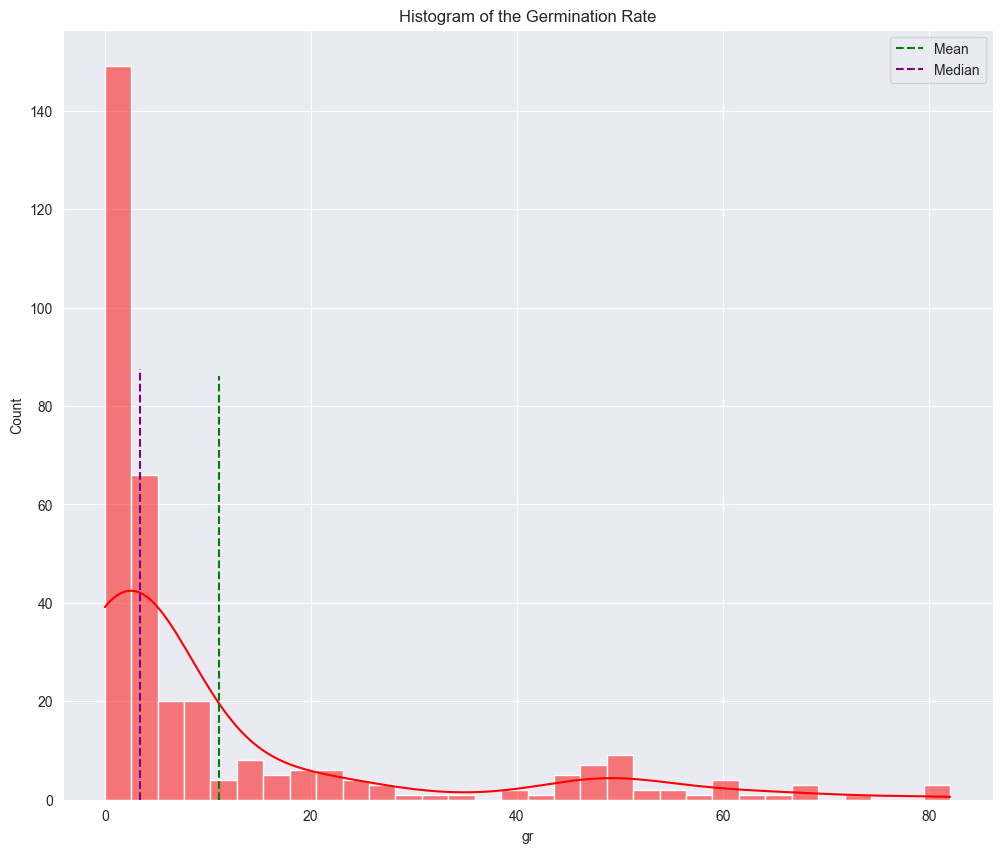

In [29]:
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="gr",color="red",kde=True)
plt.axvline(x=df["gr"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["gr"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Germination Rate")

Text(0.5, 1.0, 'Cumulative of the GErmination Rate')

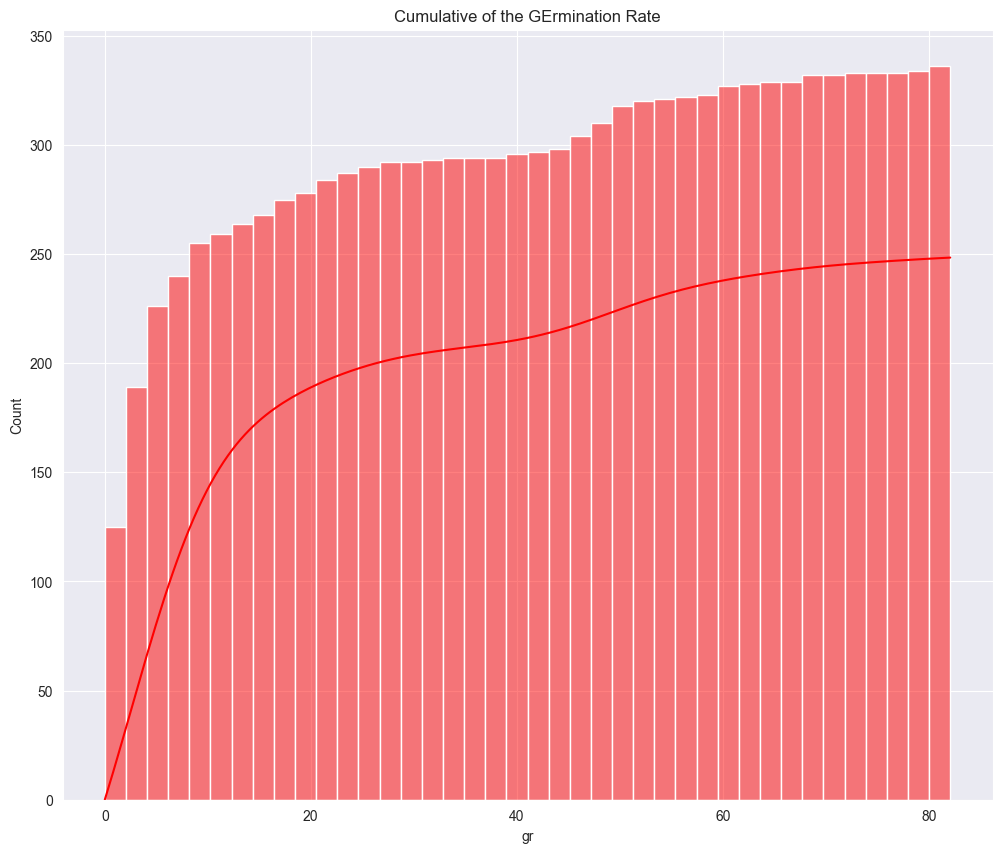

In [30]:
plt.figure(figsize = (12,10))
sns.histplot(df["gr"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Germination Rate")

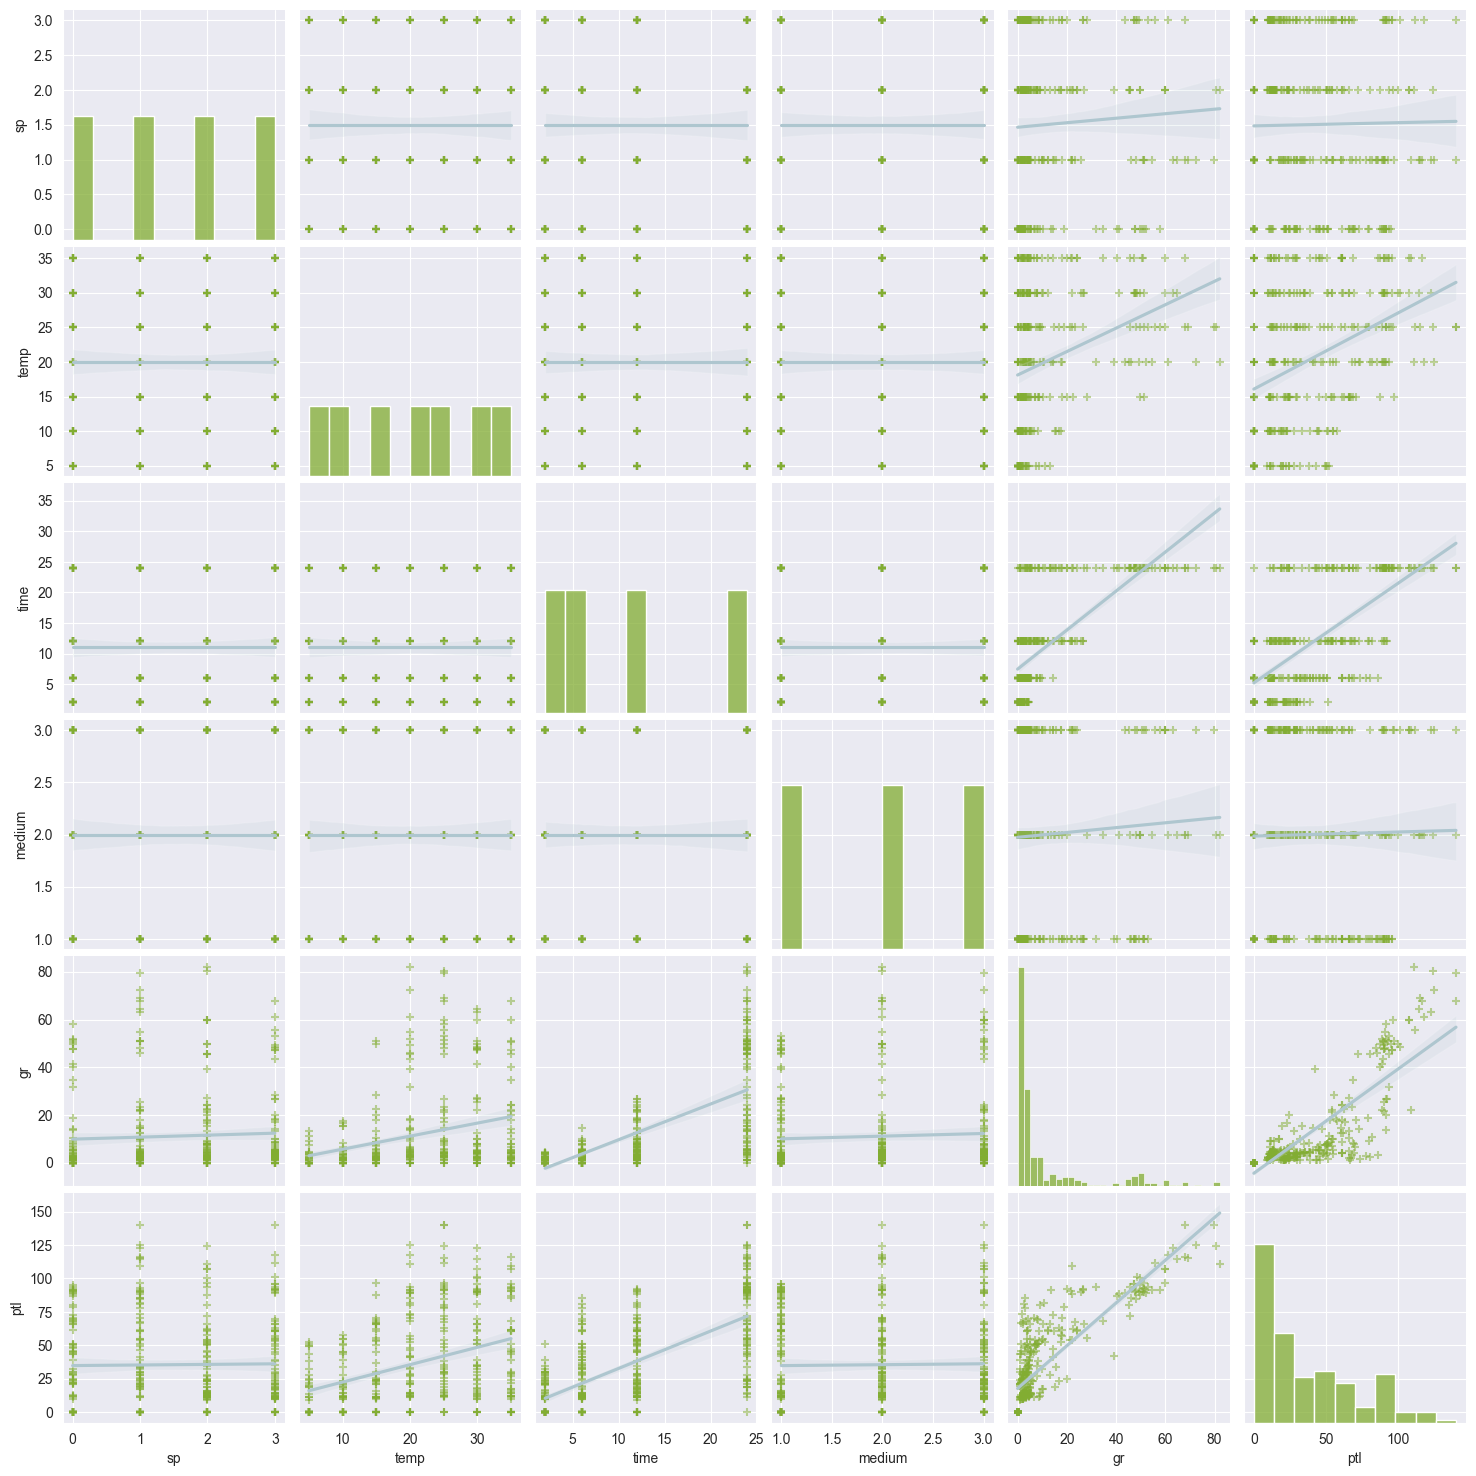

In [31]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               
                 diag_kws= {'color': '#82ad32'})

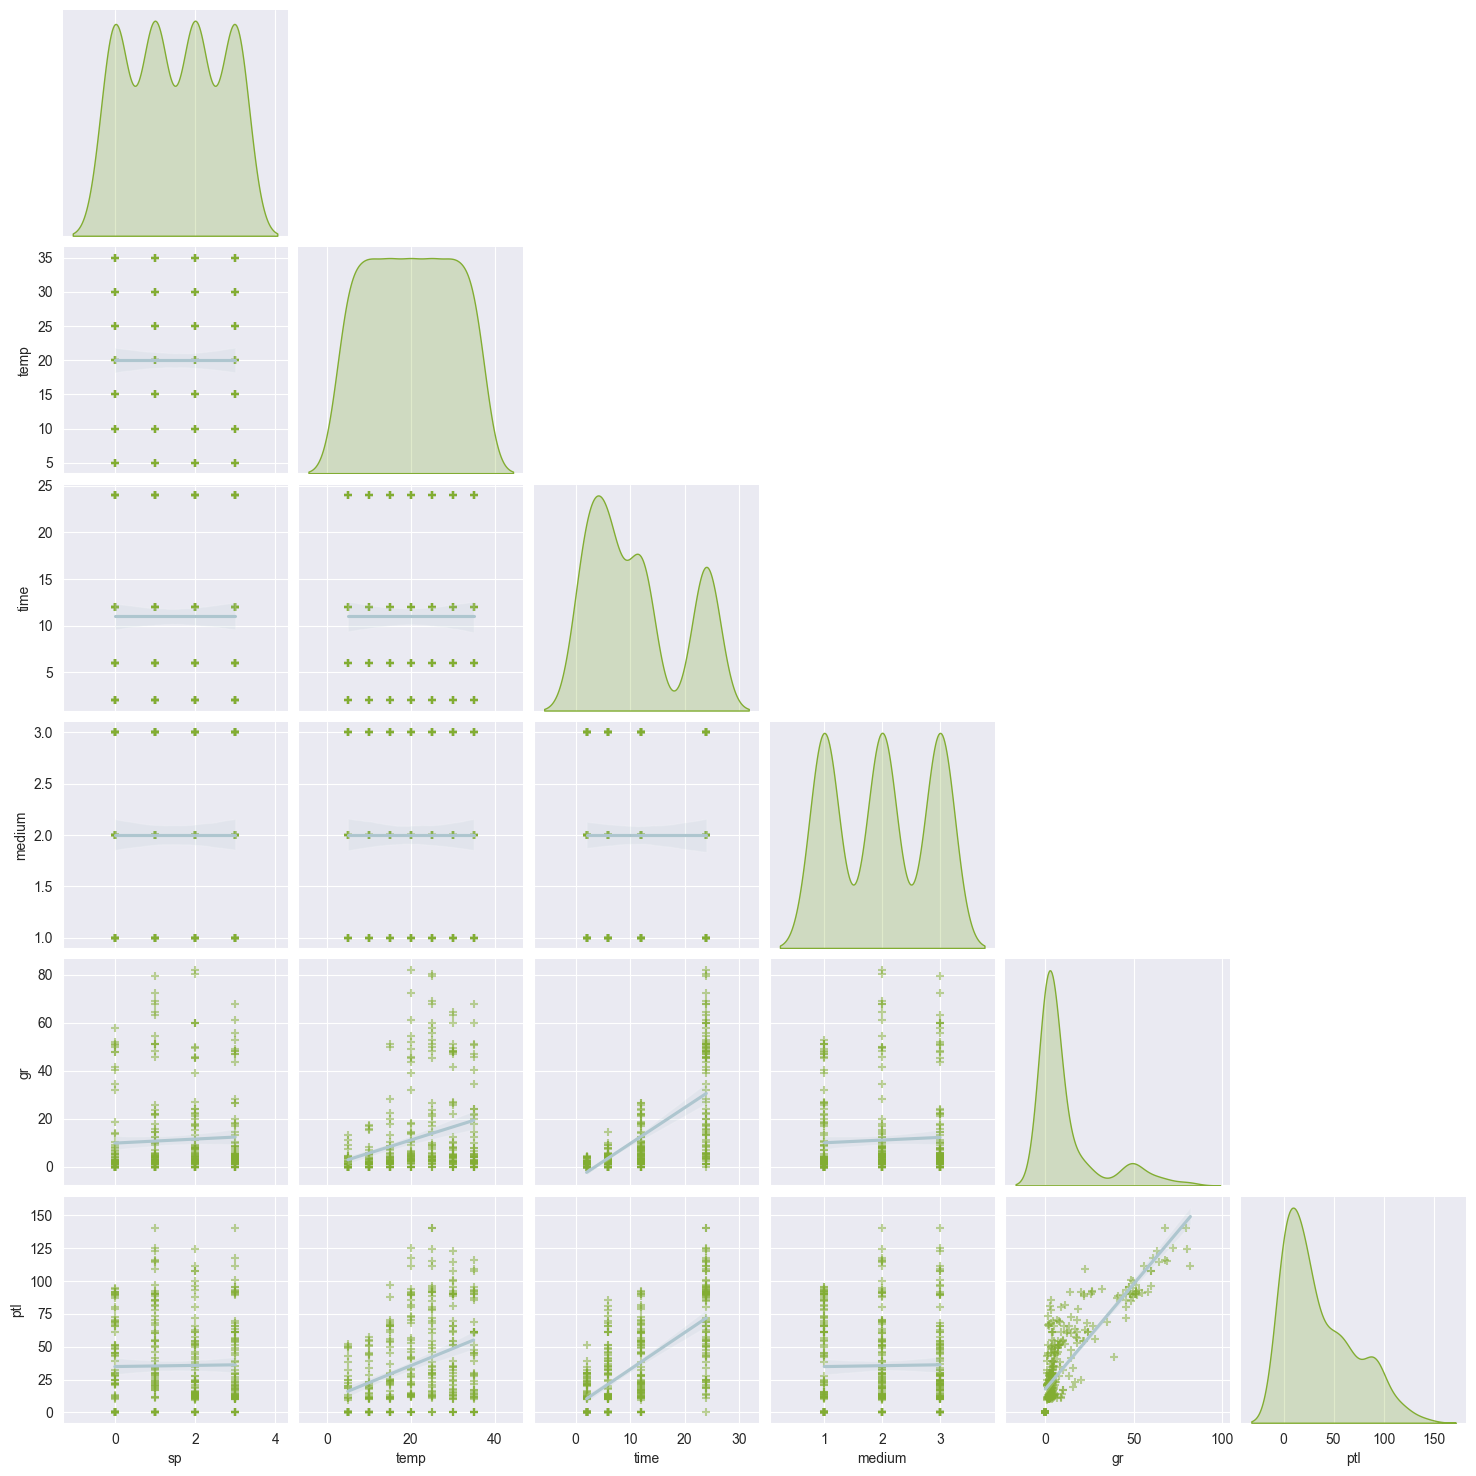

In [32]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})

<Axes: xlabel='temp', ylabel='gr'>

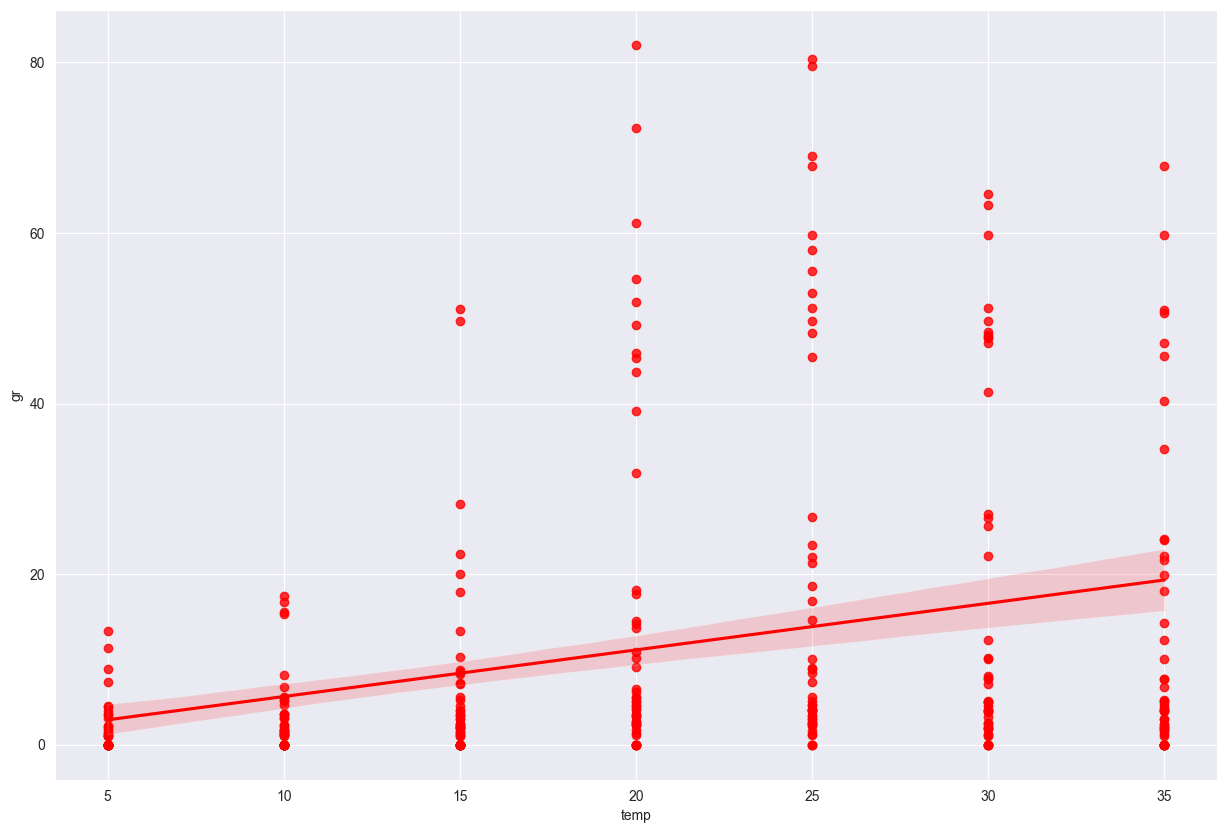

In [33]:
plt.figure(figsize = (15,10))
sns.regplot(data=df, x="temp", y="gr",color="red")

<Axes: xlabel='medium', ylabel='gr'>

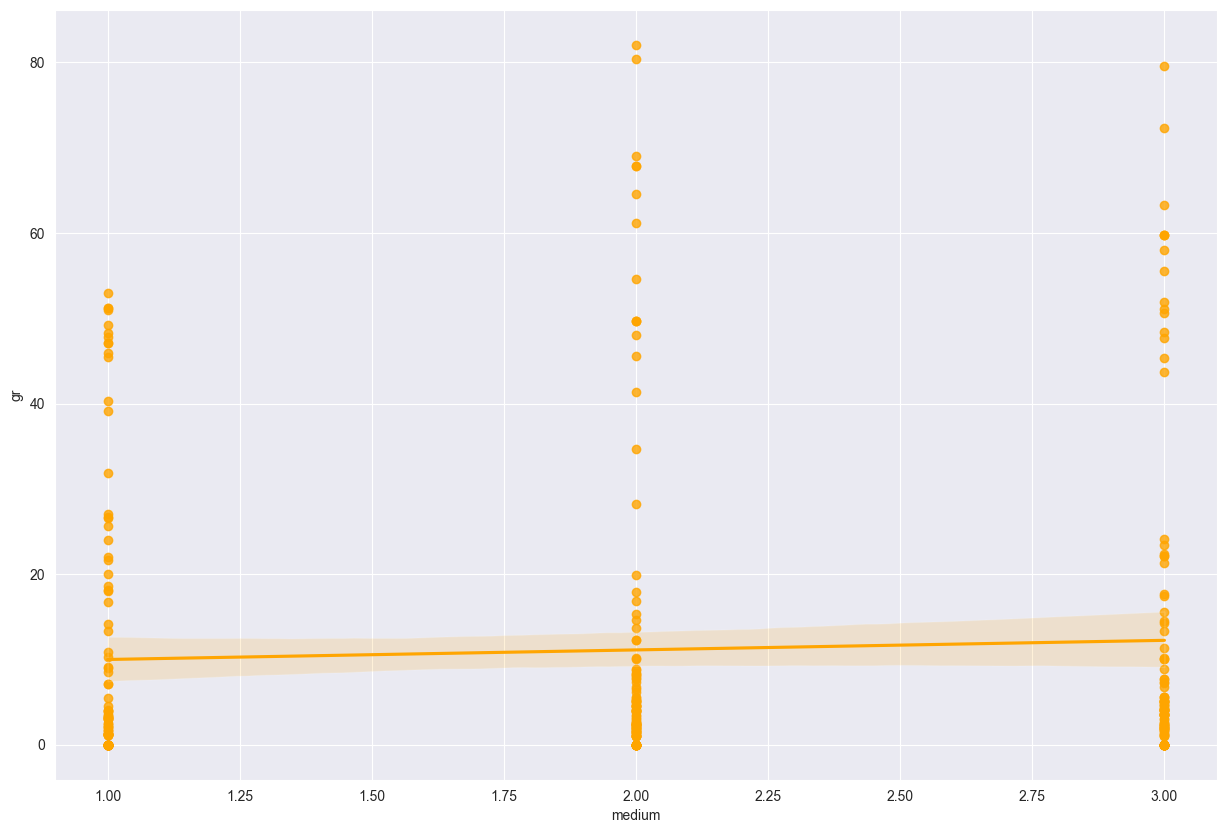

In [34]:
plt.figure(figsize = (15,10))
sns.regplot(data=df, x="medium", y="gr",color="orange")

<Axes: xlabel='ptl', ylabel='gr'>

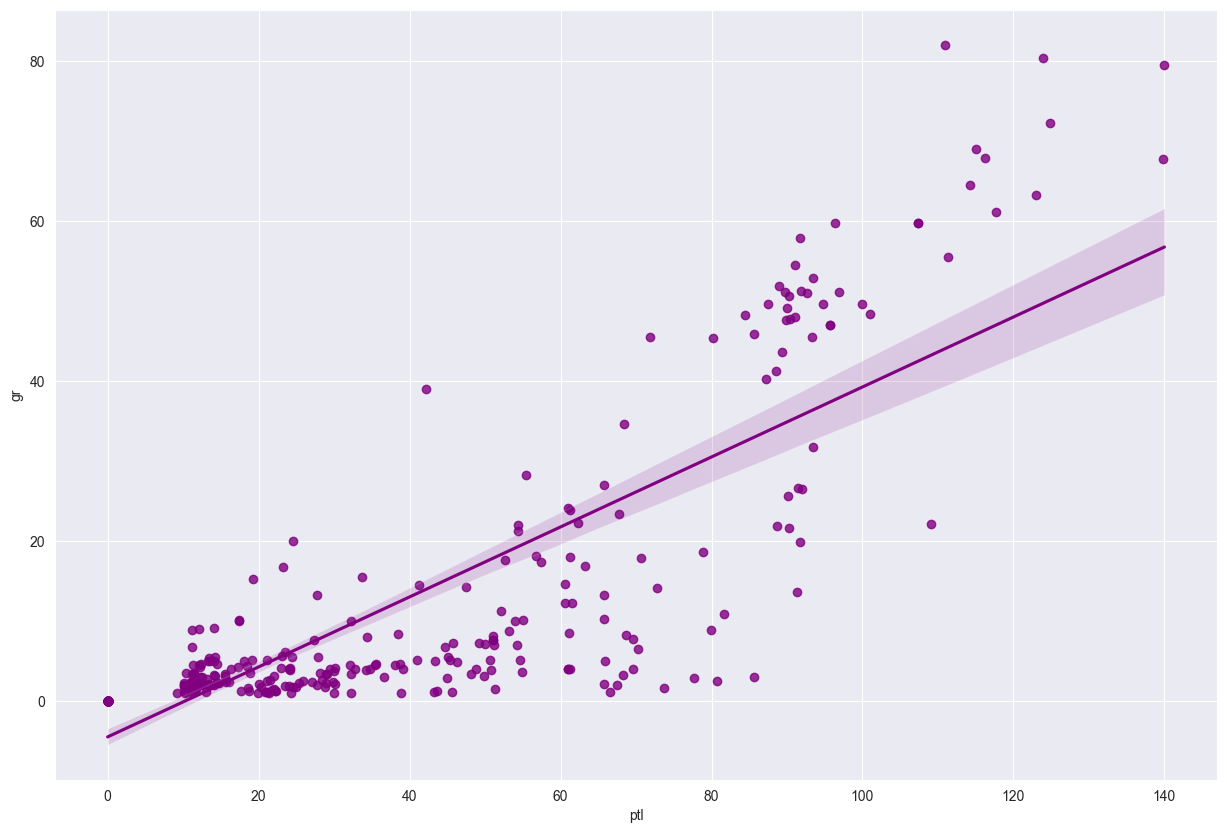

In [36]:
plt.figure(figsize = (15,10))
sns.regplot(data=df, x="ptl", y="gr",color="purple")

In [37]:
X = df.drop("gr", axis=1).values
y = df["gr"].values
print(X)
print(y)

[[  0.     5.     2.     1.     0.  ]

 [  0.    10.     2.     1.     0.  ]

 [  0.    15.     2.     1.     0.  ]

 ...

 [  3.    25.    24.     3.   111.37]

 [  3.    30.    24.     3.   100.98]

 [  3.    35.    24.     3.    47.54]]

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.

  0.    0.    0.    0.    0.   14.21 18.65  7.11  1.21  1.17  1.29 10.25

 31.85 51.24 47.82 40.31  0.    0.    0.    0.    1.58  1.    1.    0.

  0.    1.07  2.84  3.01  2.56  2.3   0.    0.    2.06  6.51  8.91  7.85

  5.24  1.03  5.21  8.34 13.69 49.69 41.36 34.67  0.    0.    1.25  2.35

  2.45  2.01  1.61  0.    1.02  2.99  3.47  4.11  5.03  4.08  0.    0.

  1.06  1.43  2.71  1.84  1.77  0.    1.17  5.57 51.95 57.96 47.68 50.67

  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.74  2.98

  2.51  3.01  0.    0.    1.24 10.87 21.98 25.64 21.64  3.14  3.65  7.1

 45.88 48.27 51.2  51.01  0.    0.    0.    2.64  2.58  4.08  4.65  1.07

  1.64  1.91  4.03  3.98  

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(268, 5)

(68, 5)

(268,)

(68,)


In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[-1.37580489  0.52712101 -1.07297753  1.23290459 -0.15100467]

 [ 0.44052866  0.02438638 -1.07297753  1.23290459 -0.40970654]

 [ 1.34869543 -1.48381751  0.13626544  1.23290459 -0.70211357]

 ...

 [-0.46763812 -0.98108288  1.58735701 -1.24213983  0.59080447]

 [ 1.34869543  0.52712101  0.13626544 -1.24213983  1.66966518]

 [-0.46763812  0.52712101  0.13626544 -1.24213983  1.58569795]]

[[-1.37580489 -0.47834825  0.13626544  1.23290459 -0.40261072]

 [-0.46763812  1.02985564  1.58735701 -1.24213983  1.62029008]

 [ 1.34869543  0.52712101  0.13626544 -0.00461762  0.83738431]

 [-0.46763812  0.02438638  1.58735701 -1.24213983  1.49729582]

 [ 1.34869543  0.52712101  1.58735701 -1.24213983  1.72731874]

 [-1.37580489 -1.48381751  0.13626544 -0.00461762 -1.03413894]

 [ 0.44052866  1.02985564 -1.07297753  1.23290459 -0.31893914]

 [ 1.34869543  0.02438638 -1.07297753 -0.00461762 -0.23290229]

 [ 1.34869543 -0.98108288  1.58735701 -0.00461762 -0.61430276]

 [-0.46763812 -1.48381751 -1.0729

In [40]:
plt.figure(figsize=(12,10))
# plt.imshow(plt.imread("../input/aritificialneural-network/ann.png"))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=6, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=6, activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=1))   # Adding Output Layer
#If we make a regression with neural networks, we do not need to add an activation function compared to classification problems

In [23]:
ann.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
ann.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

In [ ]:
pd.DataFrame(ann.history.history)

In [ ]:
plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))

In [ ]:
ann.evaluate(X_train,y_train)

In [ ]:
ann.evaluate(X_test,y_test)

In [ ]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df 

In [ ]:
print(y_test.shape)       # The actual values are 1D arrays
print(predictions.shape)  # The predictions are 2D arrays

In [ ]:
# here I will visualize the real test values(y_test) versus the predicted values.
plt.figure(figsize=(12,10))
sns.scatterplot(np.ravel(predictions),y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
#It seems that our model predicts very well

In [ ]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

In [ ]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,predictions) #This shows our model predict %93 of the target correctly

In [ ]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-predictions,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data